<ipython-input-33-fb896dc5992e>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


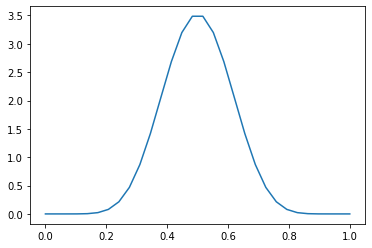

In [33]:
import numpy as np
from matplotlib.pyplot import subplots
from scipy import stats
x = np.linspace(0, 1, 30)
alpha = 10
beta = 10
fig, ax = subplots()
ax.plot(x, stats.beta(a = alpha, b = beta).pdf(x))
fig.show()
def update(states, a = 10, b = 10):
    idx, idj = np.random.randint(low =  0, high = states.size, size = (2,))
    N = states[[idx, idj]].sum()
    p = np.random.beta(a = a, b = b)
    assert 0 <= p <= 1
    states[idx] = N * p
    states[idj] = N * (1 - p)
    return states

N, T = 100, 10000
a, b = 0, 10
results = np.random.rand(N, T) #  * (b - a) + a
results[:, 0] = results[:, 0] / results[:, 0].sum()
# print(results[0].sum())
for t in range(1, T):
    results[:, t] = update(results[:, t - 1], a = alpha, b = beta)


<ipython-input-34-c6439291a83c>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


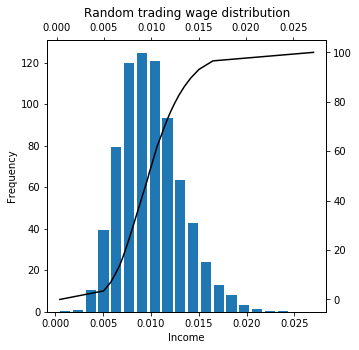

In [34]:
# from matplotlib.pyplot import subplots
x = np.linspace(0, 100, 30)
c, b = np.histogram(results.flat, bins = 20, \
                    density = 1)
b = (b[:-1] + b[1:])/ 2
%matplotlib inline
fig, ax = subplots(figsize = (5,5))
# ax.set_yscale('log')
tax = ax.twiny().twinx()
ax.bar(b, c, width = abs(np.diff(b))[0]*.8)
# ax.set_xscale('log')
tax.plot(np.percentile(results.flat, x), x, color = 'k')
ax.set(xlabel = 'Income', ylabel = 'Frequency',\
       title = 'Random trading wage distribution')
fig.show()

<ipython-input-30-270c4357fff1>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


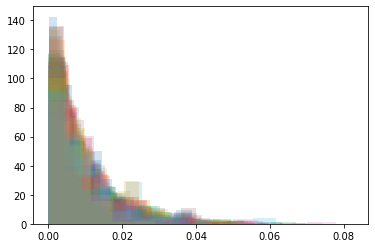

In [30]:
%matplotlib inline
fig, ax = subplots()
for i in range(N):
    ax.hist(results[i], bins = 10,\
            density = 1, alpha = .2)
fig.show()

<IPython.core.display.Javascript object>


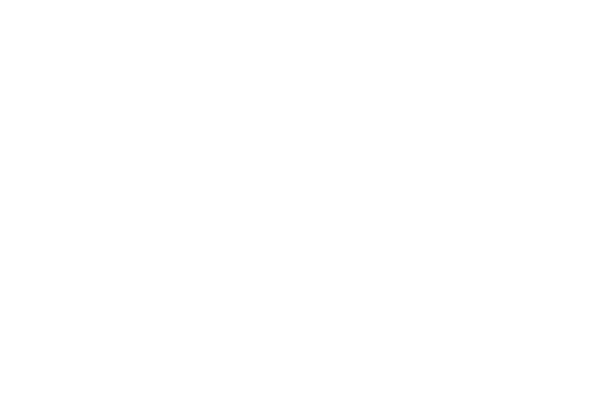

/home/casper/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<IPython.core.display.Javascript object>


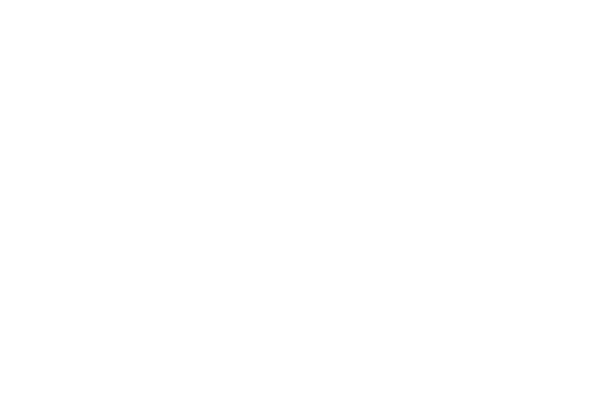

Traceback (most recent call last):
  File "/home/casper/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/casper/.local/lib/python3.8/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [60]:
from ipywidgets import interact, IntSlider
from matplotlib import rc; rc('animation', html = 'html5')
%matplotlib notebook
fig, ax = subplots()
ax.set_ylim(0, 3)
bins = np.linspace(.2, 3, 20)
tmp = np.zeros(T, dtype = tuple)
for i in range(T):
    c, b = np.histogram(results[:, i], bins = bins, density = 1)
    b = np.mean([b[:-1], b[1:]], axis = 0)
    tmp[i] = (b, c)
from matplotlib.animation import FuncAnimation  
h = ax.bar(*tmp[0], width = abs(np.diff(bins)[0])*.8)
ax.set_xlabel('Income')
ax.set_ylabel('Frequency')
# @interact(idx = IntSlider(min = 0, max = T-1))
def draw(idx):
    b, c = tmp[idx]
    for z, p in enumerate(ax.patches):
        p.set(height = c[z])
    ax.set_title(f'Time = {idx}')
    fig.canvas.draw(); fig.canvas.flush_events()
ani = FuncAnimation(fig, draw, \
                    frames= np.linspace(0, T-1, 100, dtype = int),\
                    blit=True)
fig.show()

ani.save('test.mp4')
    